In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point, MultiPoint
import time
from datetime import datetime
import seaborn as sns
pd.set_option('display.max_rows', 100)

In [2]:
sp_shp = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/sp_pop_shp/sp_pop_shp.shp')

In [3]:
sp_shp

,CLASSID,FEATID,REVISIONNU,NOME_DIST,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID,distrito_x,pop_maior_,distrito_y,pop_maio_1,geometry
0,4.0,8583485.0,1.0,JOSE BONIFACIO,JBO,47,27,2007-03-19,0.0,47,112070,47,102489,"POLYGON ((352436.869 7394174.148, 352450.740 7..."
1,4.0,8583484.0,1.0,JD SAO LUIS,JDS,46,18,2007-03-19,0.0,46,234998,46,215021,"POLYGON ((320696.639 7383620.282, 320699.486 7..."
2,4.0,8583445.0,1.0,ARTUR ALVIM,AAL,5,21,2007-03-19,0.0,5,82837,5,77007,"POLYGON ((349461.276 7397764.525, 349461.935 7..."
3,4.0,8583479.0,1.0,JAGUARA,JAG,40,08,2007-03-19,0.0,40,19980,40,18694,"POLYGON ((320731.080 7400614.592, 320732.386 7..."
4,4.0,8583437.0,1.0,VILA PRUDENTE,VPR,93,29,2007-03-19,0.0,93,88100,93,82721,"POLYGON ((338651.039 7392203.484, 338654.034 7..."
5,4.0,8583480.0,1.0,JAGUARE,JRE,41,08,2007-03-19,0.0,41,45185,41,41683,"POLYGON ((320606.161 7394439.116, 320608.927 7..."
6,4.0,8583481.0,1.0,JARAGUA,JAR,42,02,2007-03-19,0.0,42,169714,42,154212,"POLYGON ((320069.659 7407622.486, 320069.992 7..."
7,4.0,8583482.0,1.0,JD HELENA,JDH,44,23,2007-03-19,0.0,44,104992,44,95353,"POLYGON ((353421.390 7401397.366, 353420.401 7..."
8,4.0,8583483.0,1.0,JD PAULISTA,JDP,45,11,2007-03-19,0.0,45,78846,45,75767,"POLYGON ((329650.535 7390883.219, 329645.838 7..."
9,4.0,8583486.0,1.0,LAJEADO,LAJ,96,28,2007-03-19,0.0,96,136321,96,123505,"POLYGON ((354138.975 7396739.337, 354136.244 7..."


In [4]:
gdf_agencias_sp = pd.read_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/agencias_latlong.csv', sep=';')

In [5]:
# Set crs to use degrees in the first moment
# https://gis.stackexchange.com/questions/345071/matching-x-and-y-axis-coordinates-of-two-geopandas-geometries-to-overlay-them
gdf_agencias_sp_points = gpd.GeoDataFrame(gdf_agencias_sp, geometry=gpd.points_from_xy(gdf_agencias_sp['lon'], gdf_agencias_sp['lat']), crs=4326)

In [6]:
# Then, set the crs of points to the crs of shapefile map which is in meters
gdf_agencias_sp_points = gdf_agencias_sp_points.to_crs(sp_shp.crs)

C:\Users\Ricardo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [7]:
within_sp = gdf_agencias_sp_points[gdf_agencias_sp_points.geometry.within(sp_shp.geometry.unary_union)]

## Population: 69,2% 
## Buffer: 500
### #1

In [8]:
print("--- Start Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))
start_time = time.time()

# Create an empty dataframe
result_sim_6_1 = pd.DataFrame()
    
# Create an empty dataframe
pop_simulated = pd.DataFrame()

# For each district, generate a lat long based on pop
for index, row in sp_shp.iterrows():
    pointsx = []
    pointsy = []
    minx, miny, maxx, maxy = row["geometry"].bounds
    while len(pointsx) < row['pop_maio_1']*0.692:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        pnt = Point(x, y)
        if row["geometry"].contains(pnt):
            pointsx.append(x)
            pointsy.append(y)
    df = pd.DataFrame(
        {'x': pointsx, 'y': pointsy}
    ) 
    pop_simulated = pop_simulated.append(df)

gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

for index, row in sp_shp.iterrows():
    # Getting pop inside district
    within_district = gdf[gdf.geometry.within(row.geometry)]

    # Getting agencies inside district
    within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

    # Getting pop inside buffer
    within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(500).unary_union)]
    #print(within_district.shape[0], within_pop.shape[0])

    df = pd.DataFrame(
        {'simulacao': 'simulacao_6_1', 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[index]
    ) 
    result_sim_6_1 = result_sim_6_1.append(df)
        
print("--- %s seconds ---" % (time.time() - start_time))
print("--- End Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))

--- Start Time: 21/03/2022 12:20 ---
--- 8969.51914858818 seconds ---
--- End Time: 21/03/2022 14:49 ---


In [9]:
result_sim_6_1

,simulacao,pop_total,pop_buffer,perc_atendimento,nome_distrito,cod_distrito
0,simulacao_6_1,70923,2725,0.038422,JOSE BONIFACIO,47
1,simulacao_6_1,148795,24513,0.164743,JD SAO LUIS,46
2,simulacao_6_1,53289,9598,0.180112,ARTUR ALVIM,5
3,simulacao_6_1,12937,3917,0.302775,JAGUARA,40
4,simulacao_6_1,57243,27224,0.475587,VILA PRUDENTE,93
5,simulacao_6_1,28845,7560,0.262090,JAGUARE,41
6,simulacao_6_1,106715,9257,0.086745,JARAGUA,42
7,simulacao_6_1,65985,9444,0.143123,JD HELENA,44
8,simulacao_6_1,52431,50030,0.954206,JD PAULISTA,45
9,simulacao_6_1,85466,7611,0.089053,LAJEADO,96


<AxesSubplot:xlabel='simulacao', ylabel='nome_distrito'>

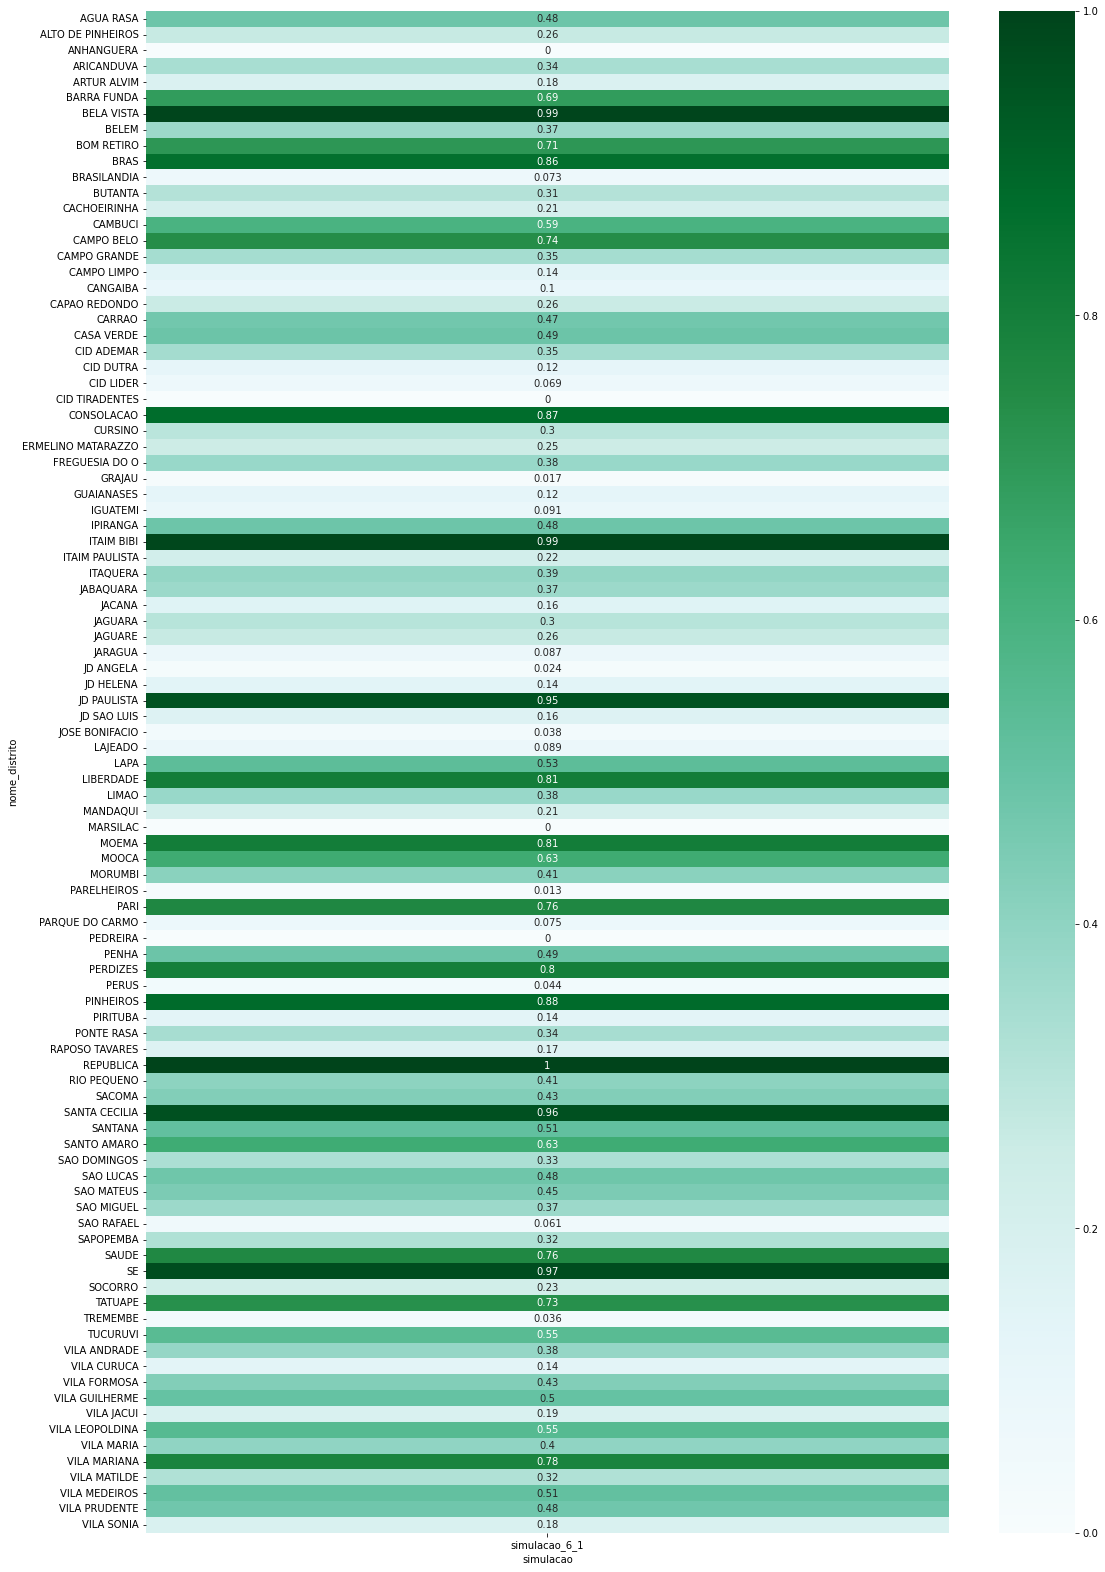

In [10]:
heatmap = result_sim_6_1[['simulacao', 'perc_atendimento', 'nome_distrito']].pivot(index='nome_distrito', columns='simulacao')['perc_atendimento']
fig,ax = plt.subplots(1,1,figsize=(18,28))
sns.heatmap(heatmap, cmap="BuGn", annot=True, ax=ax)

In [11]:
result_sim_6_1.to_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_1.csv', index=False)

## Population: 69,2% 
## Buffer: 500
### #2

In [13]:
print("--- Start Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))
start_time = time.time()

# Create an empty dataframe
result_sim_6_2 = pd.DataFrame()
    
# Create an empty dataframe
pop_simulated = pd.DataFrame()

# For each district, generate a lat long based on pop
for index, row in sp_shp.iterrows():
    pointsx = []
    pointsy = []
    minx, miny, maxx, maxy = row["geometry"].bounds
    while len(pointsx) < row['pop_maio_1']*0.692:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        pnt = Point(x, y)
        if row["geometry"].contains(pnt):
            pointsx.append(x)
            pointsy.append(y)
    df = pd.DataFrame(
        {'x': pointsx, 'y': pointsy}
    ) 
    pop_simulated = pop_simulated.append(df)

gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

for index, row in sp_shp.iterrows():
    # Getting pop inside district
    within_district = gdf[gdf.geometry.within(row.geometry)]

    # Getting agencies inside district
    within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

    # Getting pop inside buffer
    within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(500).unary_union)]
    #print(within_district.shape[0], within_pop.shape[0])

    df = pd.DataFrame(
        {'simulacao': 'simulacao_6_2', 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[index]
    ) 
    result_sim_6_2 = result_sim_6_2.append(df)
        
print("--- %s seconds ---" % (time.time() - start_time))
print("--- End Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))

--- Start Time: 21/03/2022 16:21 ---
--- 9759.07309961319 seconds ---
--- End Time: 21/03/2022 19:04 ---


In [15]:
result_sim_6_2

,simulacao,pop_total,pop_buffer,perc_atendimento,nome_distrito,cod_distrito
0,simulacao_6_2,70923,2879,0.040593,JOSE BONIFACIO,47
1,simulacao_6_2,148795,24763,0.166424,JD SAO LUIS,46
2,simulacao_6_2,53289,9443,0.177204,ARTUR ALVIM,5
3,simulacao_6_2,12937,3901,0.301538,JAGUARA,40
4,simulacao_6_2,57243,27494,0.480303,VILA PRUDENTE,93
5,simulacao_6_2,28845,7590,0.263131,JAGUARE,41
6,simulacao_6_2,106715,9294,0.087092,JARAGUA,42
7,simulacao_6_2,65985,9266,0.140426,JD HELENA,44
8,simulacao_6_2,52431,50023,0.954073,JD PAULISTA,45
9,simulacao_6_2,85466,7569,0.088562,LAJEADO,96


<AxesSubplot:xlabel='simulacao', ylabel='nome_distrito'>

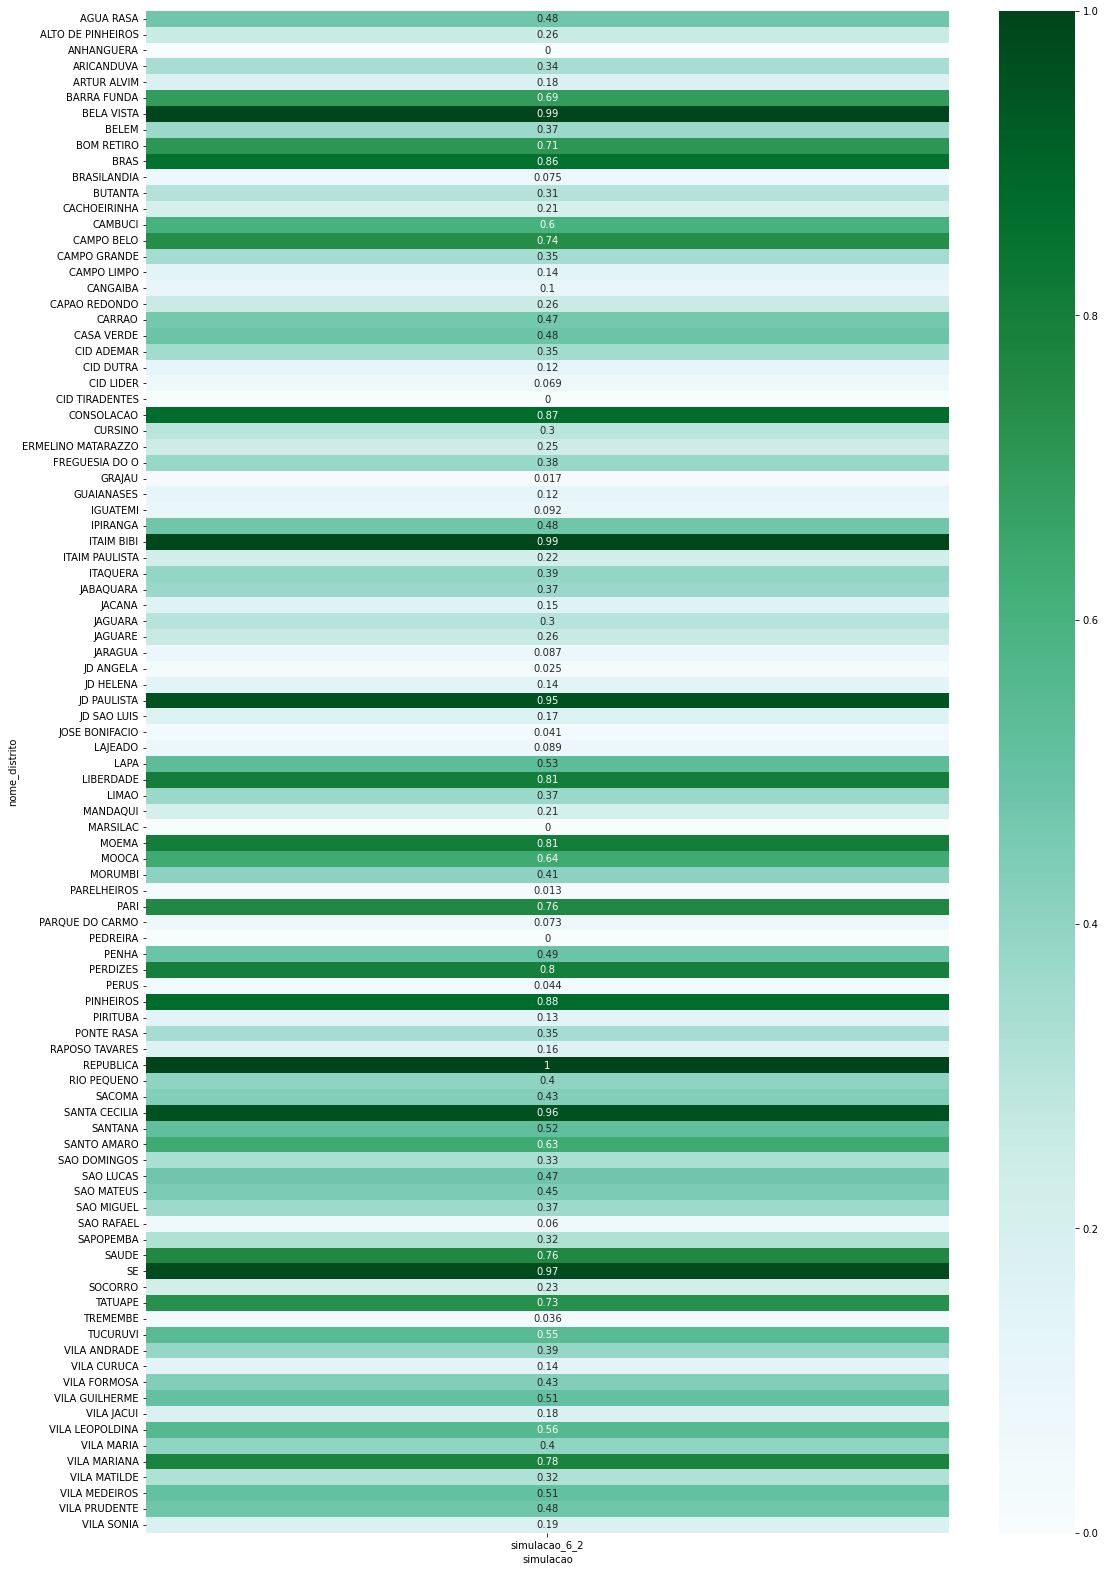

In [16]:
heatmap = result_sim_6_2[['simulacao', 'perc_atendimento', 'nome_distrito']].pivot(index='nome_distrito', columns='simulacao')['perc_atendimento']
fig,ax = plt.subplots(1,1,figsize=(18,28))
sns.heatmap(heatmap, cmap="BuGn", annot=True, ax=ax)

In [17]:
result_sim_6_2.to_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_2.csv', index=False)

## Population: 69,2% 
## Buffer: 500
### #3

In [8]:
print("--- Start Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))
start_time = time.time()

# Create an empty dataframe
result_sim_6_3 = pd.DataFrame()
    
# Create an empty dataframe
pop_simulated = pd.DataFrame()

# For each district, generate a lat long based on pop
for index, row in sp_shp.iterrows():
    pointsx = []
    pointsy = []
    minx, miny, maxx, maxy = row["geometry"].bounds
    while len(pointsx) < row['pop_maio_1']*0.692:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        pnt = Point(x, y)
        if row["geometry"].contains(pnt):
            pointsx.append(x)
            pointsy.append(y)
    df = pd.DataFrame(
        {'x': pointsx, 'y': pointsy}
    ) 
    pop_simulated = pop_simulated.append(df)

gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

for index, row in sp_shp.iterrows():
    # Getting pop inside district
    within_district = gdf[gdf.geometry.within(row.geometry)]

    # Getting agencies inside district
    within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

    # Getting pop inside buffer
    within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(500).unary_union)]
    #print(within_district.shape[0], within_pop.shape[0])

    df = pd.DataFrame(
        {'simulacao': 'simulacao_6_3', 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[index]
    ) 
    result_sim_6_3 = result_sim_6_3.append(df)
        
print("--- %s seconds ---" % (time.time() - start_time))
print("--- End Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))

--- Start Time: 21/03/2022 19:48 ---
--- 9277.450434446335 seconds ---
--- End Time: 21/03/2022 22:23 ---


In [9]:
result_sim_6_3

,simulacao,pop_total,pop_buffer,perc_atendimento,nome_distrito,cod_distrito
0,simulacao_6_3,70923,2760,0.038915,JOSE BONIFACIO,47
1,simulacao_6_3,148795,24546,0.164965,JD SAO LUIS,46
2,simulacao_6_3,53289,9510,0.178461,ARTUR ALVIM,5
3,simulacao_6_3,12937,3872,0.299297,JAGUARA,40
4,simulacao_6_3,57243,27394,0.478556,VILA PRUDENTE,93
5,simulacao_6_3,28845,7407,0.256786,JAGUARE,41
6,simulacao_6_3,106715,9189,0.086108,JARAGUA,42
7,simulacao_6_3,65985,9353,0.141744,JD HELENA,44
8,simulacao_6_3,52431,49989,0.953425,JD PAULISTA,45
9,simulacao_6_3,85466,7626,0.089228,LAJEADO,96


<AxesSubplot:xlabel='simulacao', ylabel='nome_distrito'>

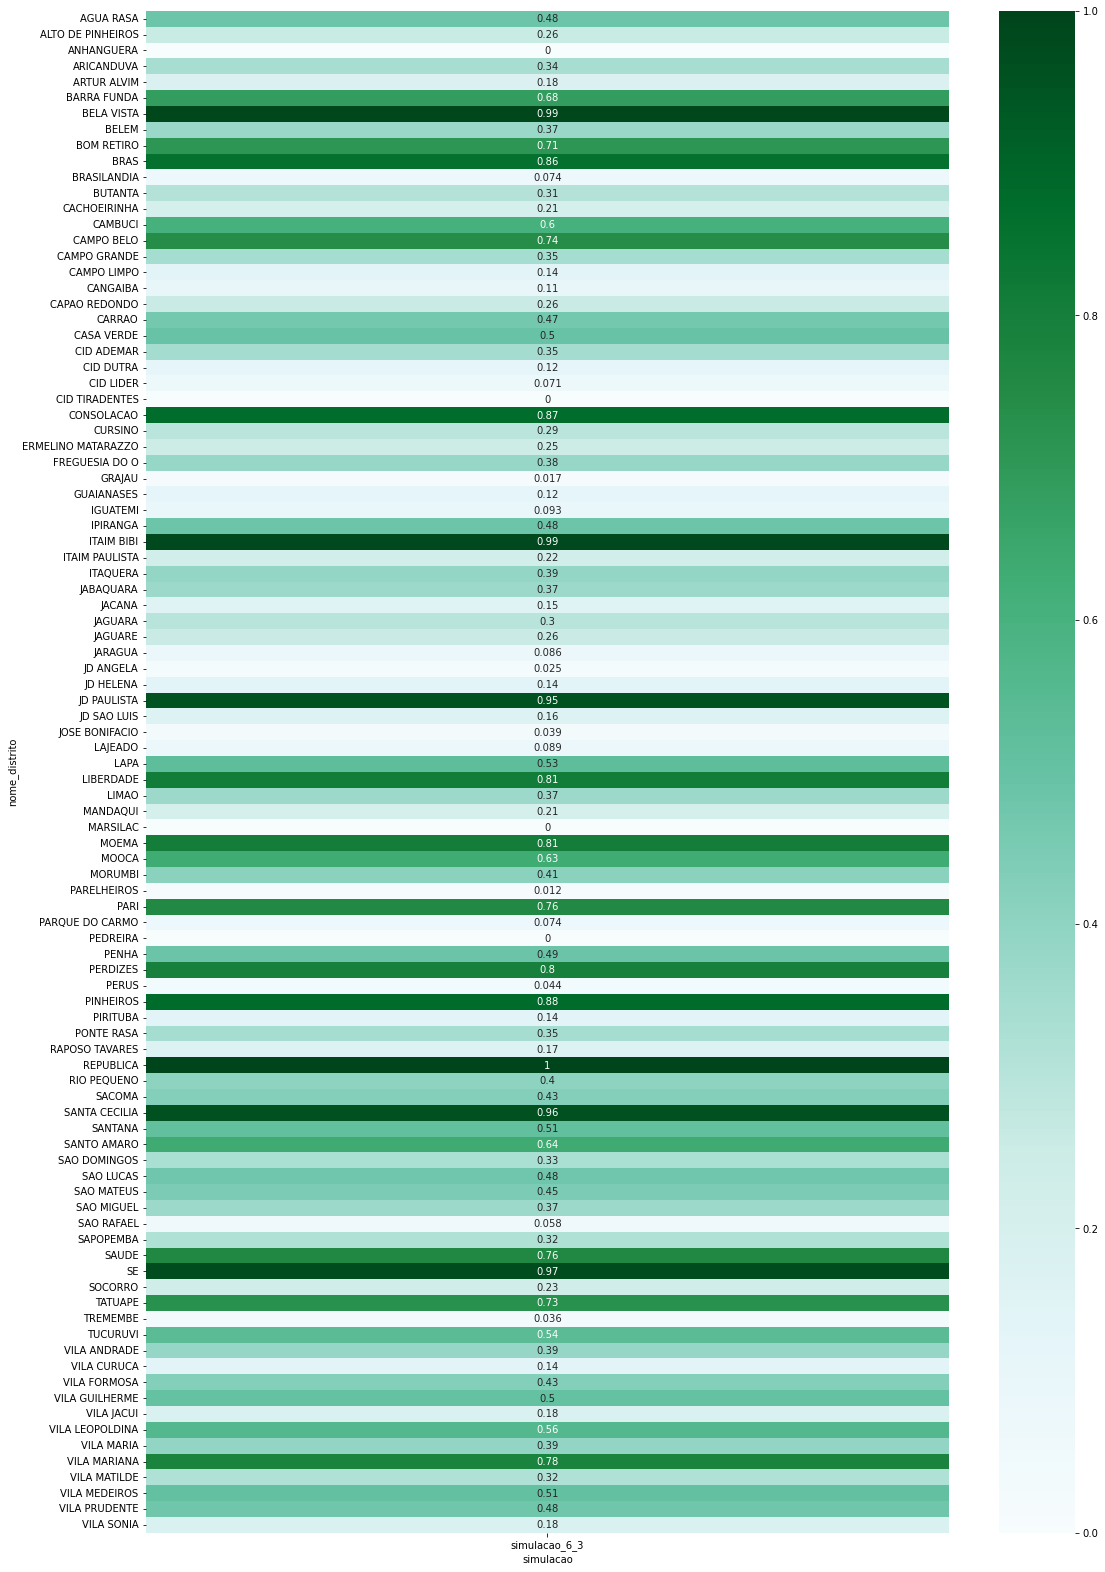

In [10]:
heatmap = result_sim_6_3[['simulacao', 'perc_atendimento', 'nome_distrito']].pivot(index='nome_distrito', columns='simulacao')['perc_atendimento']
fig,ax = plt.subplots(1,1,figsize=(18,28))
sns.heatmap(heatmap, cmap="BuGn", annot=True, ax=ax)

In [11]:
result_sim_6_3.to_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_3.csv', index=False)

In [ ]:
sp_shp_agg = sp_shp.merge(result_sim_6_1, how='left',left_on='COD_DIST', right_on='cod_distrito')

In [ ]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot
sp_shp_agg.plot(column='perc_atendimento', cmap="Oranges", legend=True, ax=ax)

ax.axis("off")
plt.show()

In [ ]:
print("--- Start Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))
start_time = time.time()

# Create an empty dataframe
result_sim_6_1 = pd.DataFrame()
    
for i in range(10):
    print(i)
    # Create an empty dataframe
    pop_simulated = pd.DataFrame()

    # For each district, generate a lat long based on pop
    for index, row in sp_shp.iterrows():
        pointsx = []
        pointsy = []
        minx, miny, maxx, maxy = row["geometry"].bounds
        while len(pointsx) < row['pop_maio_1']*0.692:
            x = random.uniform(minx, maxx)
            y = random.uniform(miny, maxy)
            pnt = Point(x, y)
            if row["geometry"].contains(pnt):
                pointsx.append(x)
                pointsy.append(y)
        df = pd.DataFrame(
            {'x': pointsx, 'y': pointsy}
        ) 
        pop_simulated = pop_simulated.append(df)

    gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

    

    for index, row in sp_shp.iterrows():
        # Getting pop inside district
        within_district = gdf[gdf.geometry.within(row.geometry)]

        # Getting agencies inside district
        within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

        # Getting pop inside buffer
        within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(500).unary_union)]
        #print(within_district.shape[0], within_pop.shape[0])

        df = pd.DataFrame(
            {'simulacao': 'simulacao_'+str(i), 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[0]
        ) 
        result_sim_6_1 = result_sim_6_1.append(df)
        
print("--- %s seconds ---" % (time.time() - start_time))
print("--- End Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))